# Fun With Word Embeddings

Word embeddings (or "word vectors") are mappings from discrete word tokens (e.g., the word "kitten") to numerical vectors, e.g., a 200-dimensional vector of real numbers. The goal is for words that are related (such as "scared" and "afraid") to map to points that are close together in the 200-dimensional space.

These continous representations for words have proven very helpful in many NLP tasks. For example, they can help deal with synonyms that would otherwise have been considered totally unrelated in the bag of words approach to representing documents.

There are several approaches for finding such an embedding. One approach is to analyze the contexts that words appear in over a large corpus and then find embeddings that map words with similar contexts to similar points in the space. For example,

    I am scared of dogs.
    I am scared of bees.
    I am afraid of dogs.
    I am afraid of bees.
    ...

The words "scared" and "afraid" both appear in the contexts

    "I am ... of dogs"

and

    "I am ... of bees"

so it's likely that the words are related in some way. The relationship can be semantic (related to meaning) or syntactic (e.g., often occur between a determiner and a noun) In this case, "scared" and "afraid" are related semantically (similar meaning) and also syntactically (both adjectives).

One really neat thing that researchers discovered is that word embeddings can be used to solve analogies, e.g., 

    "puppy" is to "dog" as "kitten" is to ?
    
Amazingly, this kind of puzzle can be solved by doing computations on word vectors:

```python
wv["kitten"] - wv["puppy"] + wv["dog"]
```

and finding the most similar word to the result, `wv["cat"]` in this case.

The reason is that the vector `(wv["dog"] - wv["puppy"])` represents a direction in the space the often takes the youth version of a concept to the adult version. So starting with "kitten" and moving in that direction winds up in an area of the space similar to "cat".

## 0 Imports

In [1]:
from collections import defaultdict
import numpy as np
import time
import gensim
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Load pre-trained GloVe embeddings using gensim library

The [gensim](https://radimrehurek.com/gensim/) library is a great tool for working with word embeddings and doing other things with text (like analyzing latent topics). If you need to install gensim, try: 

    pip install gensim

We're going to use gensim to explore some pre-trained word embeddings trained with an algorithm called [GloVe](https://nlp.stanford.edu/projects/glove/).

The following code will now use gensim to load the word vectors into a variable called `glove`.

In [2]:
from collections import defaultdict
import numpy as np
import time
import gensim
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

from cogworks_data.language import get_data_path

%matplotlib inline

path = get_data_path("glove.6B.200d.txt.w2v")

t0 = time.time()
glove = KeyedVectors.load_word2vec_format(path, binary=False)
t1 = time.time()
print("elapsed %ss" % (t1 - t0))
# 50d: elapsed 17.67420792579651s
# 100d: 

elapsed 85.28354072570801s


You can get the word vector for a word (string) with the following: 

In [3]:
glove["word"]

array([ 6.5537e-01,  3.8735e-01,  1.0087e+00, -6.3381e-01, -4.5534e-02,
        6.1659e-02, -1.0346e+00,  6.1857e-01,  1.8365e-01, -3.5483e-02,
       -4.2561e-01,  2.3375e-01,  1.0319e-01,  1.2349e-01,  2.5503e-01,
       -1.1548e-03,  3.2842e-02,  3.9811e-01,  1.5354e-02, -2.1607e-01,
        1.6743e-01,  2.2086e+00, -4.5581e-02,  7.8442e-02,  3.2552e-01,
       -5.4530e-01, -2.9485e-02,  1.4030e-01, -3.0879e-02,  3.1680e-02,
       -3.9292e-01, -3.8353e-02, -3.0280e-01, -1.1658e-01,  5.0048e-01,
       -7.3475e-01, -3.5356e-01, -3.2892e-01,  4.2470e-01, -1.4566e-01,
       -3.5084e-01, -2.7194e-01, -6.5209e-02, -1.5440e-01,  7.0614e-02,
        2.5056e-01,  6.5610e-01,  4.4557e-01,  2.2948e-01,  3.9053e-01,
       -6.7766e-01,  1.3839e-02,  3.6866e-01, -4.7221e-02,  1.6317e-01,
        8.8860e-02, -3.9998e-01, -4.1804e-02, -3.2117e-01,  2.3329e-01,
       -1.9320e-01, -5.0800e-01, -3.5526e-01, -1.8716e-01, -1.7210e-01,
       -7.4046e-02, -1.9402e-01, -1.1080e-01,  6.2392e-01,  2.38

Print out the word vector for your favorite word. Note: you can check that the word is in the 400K lowercased vocabulary with:

In [4]:
"word" in glove

True

What's the type of the word vector (e.g. a numpy array, a tuple)? What's its shape?

In [5]:
v = glove["rose"]
print(v)
print(type(v))
print(v.shape)

[ 3.1793e-01  3.4400e-01 -9.0511e-01 -4.3271e-01  1.1543e-01  1.5383e-01
  2.3106e-01 -4.7584e-01  3.1800e-02  7.6982e-02 -3.7044e-01  2.5391e-01
  1.4194e-01 -7.0610e-01  4.4894e-01 -8.6902e-02 -1.5834e-01 -1.3260e-01
  6.0105e-01  2.0148e-02 -1.3347e-01  1.9599e+00 -1.3208e-01  6.1703e-02
 -3.8635e-01  3.0429e-01 -3.8309e-01  5.7872e-01 -3.3823e-01  3.6471e-01
  3.6213e-01 -3.6225e-01 -1.6756e-01 -1.9927e-01  5.5961e-01  8.0017e-03
  6.8718e-02 -2.2266e-01 -6.5866e-01  1.9091e-01  2.4851e-01 -1.4110e-01
 -8.0859e-01 -7.1051e-01 -1.3306e-01  1.6007e-01  1.9619e-01  2.8744e-01
  1.3344e-01  4.0362e-01 -6.3615e-01  4.6071e-01 -6.7271e-03  2.3876e-01
 -3.3214e-01  2.2132e-01 -8.1710e-01  3.5457e-01  1.2943e-01 -6.1575e-02
 -2.6547e-01 -5.1525e-01  1.6572e-03  1.4764e-01 -5.2639e-01 -7.9012e-02
 -3.3560e-01  9.1730e-01 -1.0942e-02 -1.5689e-01 -1.3173e-01  5.2034e-01
 -4.6518e-03  3.4052e-01  4.2375e-01  9.0476e-01  6.1334e-01 -5.7157e-01
 -2.2235e-01  6.1718e-01 -3.8707e-01 -6.1221e-01 -8

It's not clear how to (or even if we can) interpret what the individual dimensions mean. But we can gain some intuition by looking at the relationships between whole word vectors.

## 2 Finding most similar words

You can use

In [6]:
glove.most_similar("word")

[('phrase', 0.7727311849594116),
 ('meaning', 0.7680514454841614),
 ('words', 0.7433041334152222),
 ('name', 0.7073523998260498),
 ('language', 0.6791515946388245),
 ('means', 0.6407988667488098),
 ('referring', 0.6315523982048035),
 ('literally', 0.6247207522392273),
 ('refers', 0.6156948208808899),
 ('describe', 0.6129394173622131)]

to find the words that the model considers most similar to a specified word (according to cosine similarity). Try it out on "funny" and "pencil" and some other words.


In [11]:
# STUDENT CODE HERE
glove.most_similar("school")

[('schools', 0.8050940036773682),
 ('students', 0.7750486135482788),
 ('college', 0.7743677496910095),
 ('elementary', 0.7543951272964478),
 ('education', 0.6950934529304504),
 ('high', 0.6916654109954834),
 ('student', 0.6892033219337463),
 ('graduate', 0.6870005130767822),
 ('teacher', 0.6807228326797485),
 ('campus', 0.6579830646514893)]

What do you notice about the relationships of the similars words to the query word? Are they all the same part of speech (e.g., all adjectives or all verbs)? Are they synonyms or near synonyms? Are they all objects of the same type (e.g., all tools)?

## 3 Visualization through dimensionality reduction

It's difficult to visualize high-dimensional data like the 200-dimensional GloVe embeddings. So we're going to use (truncated) Singular Value Decomposition (SVD) to reduce the dimensions down to 2, which we can then easily plot.

We'll be using scikit-learn's `TruncatedSVD` implementation. When creating the object, you provide the number of desired dimensions, e.g.,

```python
svd = TruncatedSVD(n_components=2)
```

Then you fit the dimensionality reduction model to data with:

```python
svd.fit(X_train)
```

Finally, to transform a 200-dimensional matrix (or single vector) down to 2-dimensions according to the model, you call:

```python
X_reduced = svd.transform(X)
```

### Get all embeddings into a matrix

First, we'll copy all of the word embeddings into a single matrix. Note: It's a little wasteful to have loaded the embeddings using gensim (which is storing them internally already) and then copying them into a numpy array in order to apply dimensionality reduction. But it was handy to use gensim for loading and for some of it's convenient lookup methods...

In [12]:
n = len(glove.key_to_index)
d = glove.vector_size
X_glove = np.zeros((n, d))
for i, word in enumerate(glove.key_to_index.keys()):
    X_glove[i,:] = glove[word]
print(X_glove.nbytes)

640000000


### Fit `TruncatedSVD` on the `X_glove` matrix.

In [15]:
# STUDENT CODE HERE
svd = TruncatedSVD(n_components=2)
svd.fit(X_glove)
X_reduced = svd.transform(X_glove)


The following helper function will help us visualize word pairs in the reduced 2-dimensional version of the word embedding space:

In [16]:
def plot_pairs(words, word_vectors, svd):
    """ Plots pairs of words in 2D.
    
    Parameters
    ----------
    words: list[str]
        A list with an even number of words, where pairs of words have some common relationship
        (like profession and tool), e.g., ["carpenter", "hammer", "plumber", "wrench"].
        
    word_vectors: KeyedVectors instance
        A word embedding model in gensim's KeyedVectors wrapper.
        
    svd: TruncatedSVD instance
        A truncated SVD instance that's already been fit (with n_components=2).
    """

    # map specified words to 2D space
    d = word_vectors.vector_size
    words_temp = np.zeros((len(words), d))
    for i, word in enumerate(words):
        words_temp[i,:] = word_vectors[word]
    words_2D = svd.transform(words_temp)

    # plot points
    plt.scatter(words_2D[:,0], words_2D[:,1])
    
    # plot labels
    for i, txt in enumerate(words):
        plt.annotate(txt, (words_2D[i, 0], words_2D[i, 1]))

    # plot lines
    for i in range(int(len(words)/2)):
        plt.plot(words_2D[i*2:i*2+2,0], words_2D[i*2:i*2+2,1], linestyle='dashed', color='k')

### Visualize: Male vs Female

Try plotting these pairs and then adding some more to see how consistent the relationship is.

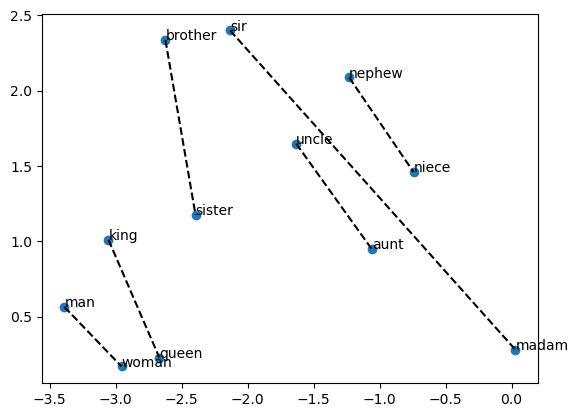

In [17]:
words = ["man", "woman", "king", "queen", "uncle", "aunt", "nephew", "niece", "brother", "sister", "sir", "madam"]
plot_pairs(words, glove, svd)

### Visualize: Adjective vs Comparative

Try plotting these pairs and then adding some more to see how consistent the relationship is.

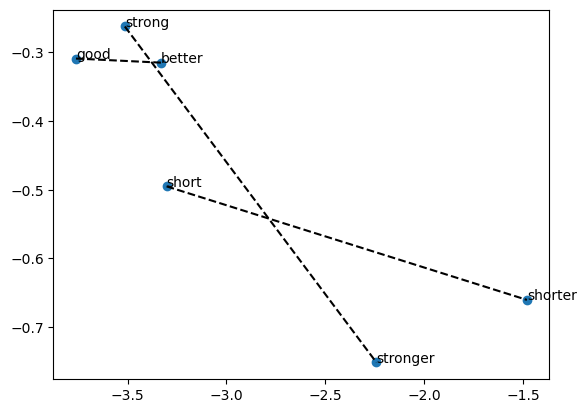

In [18]:
words = ["short", "shorter", "strong", "stronger", "good", "better"]
plot_pairs(words, glove, svd)

### Visualize: Cellular Biology Metaphors

Try plotting these pairs and then adding some more to see how consistent the relationship is.

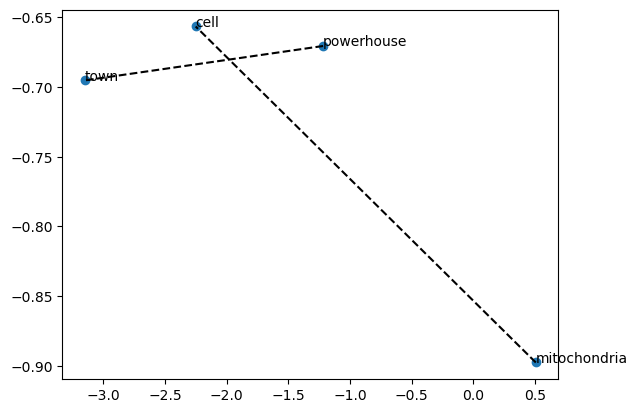

In [19]:
words = ["mitochondria", "cell", "powerhouse", "town"]
plot_pairs(words, glove, svd)

## 4 Introduction to Analogies

Let's try applying word embeddings to solve analogies of the form: $a$ is to $b$ as $c$ is to ?

We'll exploit the directions in the embedding space by finding the closest vector to $c + (b - a)$, or equivalently $c - a + b$.

A common example is: "puppy" is to "dog" as "kitten" is to ?

This can be solved by finding the closest vector to: "kitten" - "puppy" + "dog".

In [20]:
query = glove["car"] - glove["road"]
glove.similar_by_vector(query)

[('car', 0.5445271730422974),
 ('suv', 0.4152628779411316),
 ('cars', 0.3960222899913788),
 ('all-transistor', 0.389010488986969),
 ('kadett', 0.38415998220443726),
 ('subcompact', 0.3827592134475708),
 ('mercedes', 0.38206812739372253),
 ('dealership', 0.37758344411849976),
 ('vehicle', 0.3758259117603302),
 ('mid-size', 0.37351423501968384)]

Note that the most similar word (other than "dog" itself) is "cat"!

Now try solving: "france" is to "paris" as "germany" is to ?

In [24]:
# STUDENT CODE HERE
query = glove["germany"] - glove["france"] + glove["paris"] 
glove.similar_by_vector(query)

[('berlin', 0.8379163146018982),
 ('frankfurt', 0.7468419075012207),
 ('germany', 0.7307736873626709),
 ('munich', 0.7009459733963013),
 ('vienna', 0.6895925402641296),
 ('bonn', 0.6802985072135925),
 ('cologne', 0.6425222754478455),
 ('hamburg', 0.6315088868141174),
 ('leipzig', 0.6223219633102417),
 ('stuttgart', 0.612744927406311)]

Note that the gensim library has convenience methods for doing analogies. For example,

"kitten" - "puppy" + "dog"

can be solved with:

```python
glove.most_similar_cosmul(positive=['kitten', 'dog'], negative=['puppy'])
```

This uses a slightly more advanced technique for solving analogies that has "less susceptibility to one large distance dominating the calculation". See most_similar_cosmul() documentation for more details.

In [34]:
glove.most_similar_cosmul(positive=['paris', 'germany'], negative=['france'])

[('berlin', 0.9911532998085022),
 ('frankfurt', 0.9358693361282349),
 ('vienna', 0.9044881463050842),
 ('munich', 0.898804247379303),
 ('bonn', 0.8946152329444885),
 ('cologne', 0.8682121634483337),
 ('leipzig', 0.8654881119728088),
 ('hamburg', 0.8612183332443237),
 ('dresden', 0.8594275116920471),
 ('stuttgart', 0.8509519696235657)]

Try experimenting with some other kinds of word relationships (e.g., plurals, ing forms, etc.).